# 1D heat/diffusion equation:
    

# We try solving the 1 dimensional PDE using three different methods:

1. Explicit Forward Euler method (FTCS)
2. Implicit Backward Euler method (BCTS) and
3. Crank-Nicolson method

$$ \frac{\partial u}{\partial t} = \beta\frac{\partial^2 u}{\partial x^2} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import sparse

### Explicit forward euler method:

In [2]:
def FCTS(Xpoints=10,Tpoints=100,length=1,time=0.2,D=1):
    x=np.linspace(0,length,Xpoints)
    t=np.linspace(0,time,Tpoints)
    U=np.zeros((Xpoints,Tpoints))
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    
    alpha=D*(dt)/(dx**2)
    
    ## Initial and boundary condition block
    U[:,0]=0    # at t=0, concentration is zero at all points
    U[0,:]=100   # x=0 is maintained at a concentration of 100 units
    U[-1,:]=0    # x=l is maintained at a concentration of zero units
    
    ## Initial and boundary condition block ends
    
    for i in range(Tpoints-1):
        for j in range(1,Xpoints-1):
            U[j,i+1]=alpha*U[j-1,i] + (1-2*alpha)*U[j,i] + alpha*U[j+1,i]
    
    return(U,x,t)

### Evolution of the above solution with time:

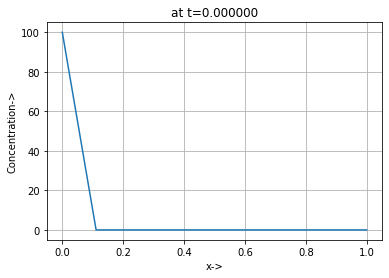

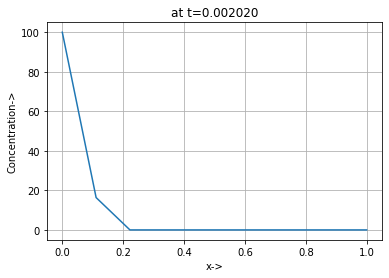

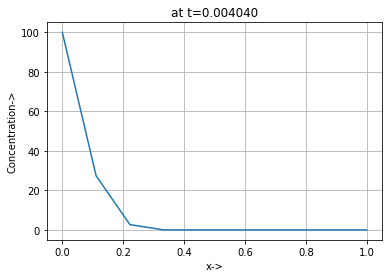

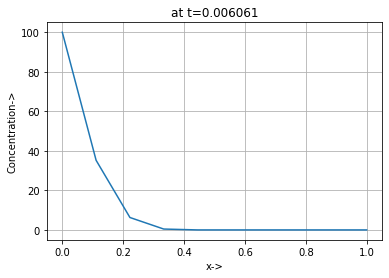

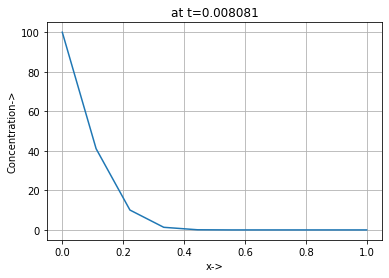

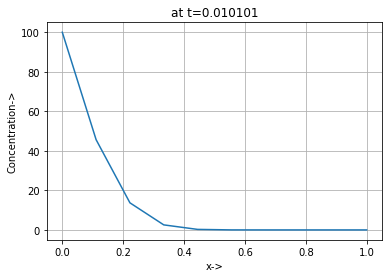

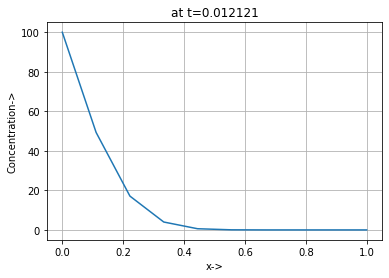

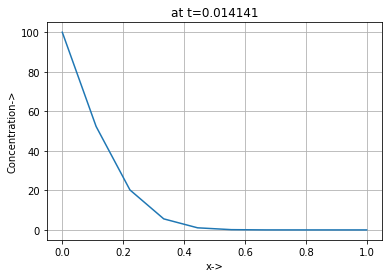

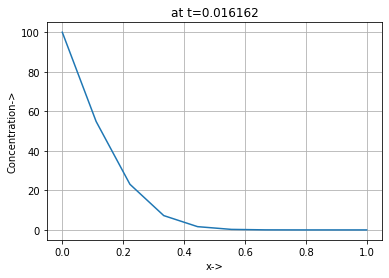

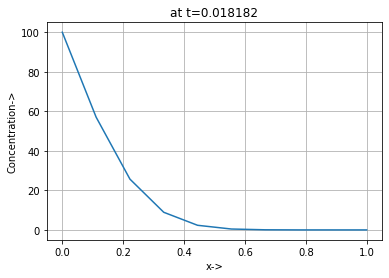

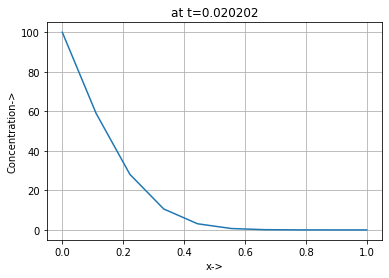

In [3]:
U1,X1,T1=FCTS()
for i in range(len(U1)+1):
    plt.plot(X1,U1[:,i])
    plt.xlabel("x->")
    plt.ylabel("Concentration->")
    plt.title('at t=%f' %T1[i])
    plt.grid()
    plt.show()

### Stability analysis : 

let us increase the number of grid points on X axis to 100. (**smaller values of dx**)

This results in oscillating erratic values. hence, it is unstable.

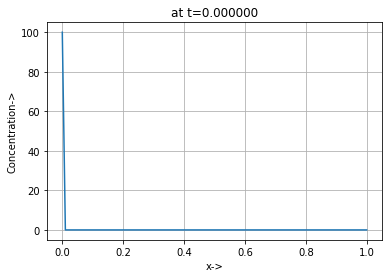

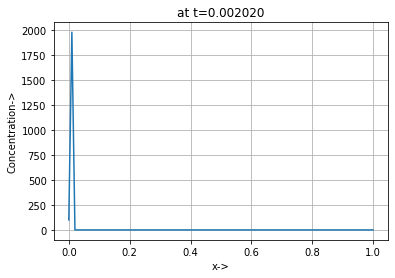

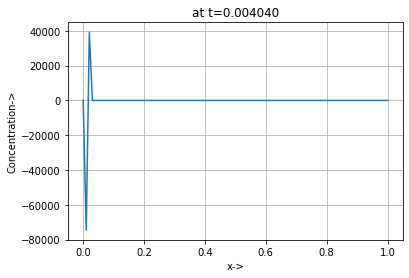

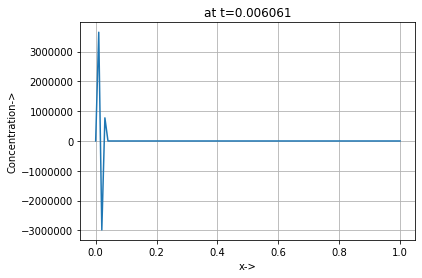

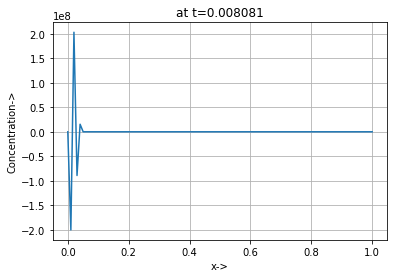

In [4]:
U2,X2,T2=FCTS(Xpoints=100)
for i in range(5):
    plt.plot(X2,U2[:,i])
    plt.xlabel("x->")
    plt.ylabel("Concentration->")
    plt.title('at t=%f' %T2[i])
    plt.grid()
    plt.show()

## Implicit Backward Euler method:

In [5]:
def BTCS(Xpoints=10,Tpoints=100,length=1,time=0.2,D=1):
    
    x=np.linspace(0,length,Xpoints)
    t=np.linspace(0,time,Tpoints)
    U=np.zeros((Xpoints,Tpoints))
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    
    alpha=D*(dt)/(dx**2)
    
    ## Initial and boundary condition block
    
    U[:,0]=0    # at t=0, concentration is zero at all points
    U[0,:]=100   # x=0 is maintained at a concentration of 100 units
    U[-1,:]=0    # x=l is maintained at a concentration of zero units
    
    ## Initial and boundary condition block ends
    
    main_diag = (1 + 2*alpha)*np.ones((1,Xpoints-2))
    off_diag = -alpha*np.ones((1, Xpoints-3))
    
    
    a = main_diag.shape[1]
    diagonals = [main_diag, off_diag, off_diag]

    ## Sparse Matrix diagonals
    A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
    
    for i in range(1, Tpoints):
        c = np.zeros((Xpoints-4,1)).ravel()
        
        b1 = np.asarray([alpha*U[0,i],alpha*U[-1,i]])
        
        b1 = np.insert(b1, 1, c)
        
        b2 = np.array(U[1:Xpoints-1, i-1])
        
        b = b1 + b2  # Right hand side
        
        U[1:Xpoints-1, i] = np.linalg.solve(A,b)  # Solve x=A\b
   
    
    return(U,x,t)
    
    
    

## Observation:

Forward Euler Method was unstable at high values of Xpoints.
However, implicit Backward Euler is **stable at high at Xpoints value and gives quick output.** The error is high compared to crank nicolson method.

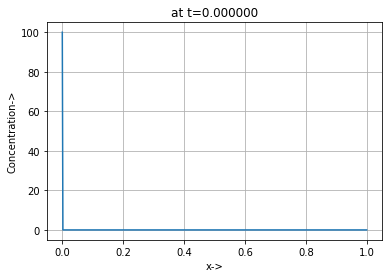

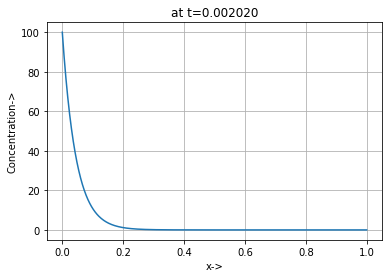

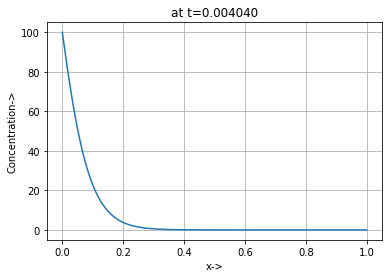

In [9]:
U4,X4,T4=BTCS(Xpoints=500)

for i in range(3):
    plt.plot(X4,U4[:,i])
    plt.xlabel("x->")
    plt.ylabel("Concentration->")
    plt.title('at t=%f' %T4[i])
    plt.grid()
    plt.show()

## Crank nicholson method:

In [17]:
def CNM(Xpoints=10,Tpoints=100,length=1,time=0.2,D=1):
    
    x=np.linspace(0,length,Xpoints)
    t=np.linspace(0,time,Tpoints)
    U=np.zeros((Xpoints,Tpoints))
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    
    alpha=D*(dt)/(dx**2)
    
    ## Initial and boundary condition block
    
    U[:,0]=0    # at t=0, concentration is zero at all points
    U[0,:]=100   # x=0 is maintained at a concentration of 100 units
    U[-1,:]=0    # x=l is maintained at a concentration of zero units
    
    ## Initial and boundary condition block ends
    
    a0 = 1 + 2*alpha
    c0 = 1 - 2*alpha
    
    maindiag_a0 = a0*np.ones((1,Xpoints-2))
    offdiag_a0 = (-alpha)*np.ones((1, Xpoints-3))

    maindiag_c0 = c0*np.ones((1,Xpoints-2))
    offdiag_c0 = alpha*np.ones((1, Xpoints-3))

    #Left-hand side tri-diagonal matrix
    a = maindiag_a0.shape[1]
    diagonalsA = [maindiag_a0, offdiag_a0, offdiag_a0]
    A = sparse.diags(diagonalsA, [0,-1,1], shape=(a,a)).toarray()
    
   

    #Right-hand side tri-diagonal matrix
    c = maindiag_c0.shape[1]
    diagonalsC = [maindiag_c0, offdiag_c0, offdiag_c0]
    
    Arhs = sparse.diags(diagonalsC, [0,-1,1], shape=(c,c)).toarray()
    
    for k in range(1, Tpoints):
        
        ins = np.zeros((Xpoints-4,1)).ravel()
        
        b1 = np.asarray([alpha*U[0,k]+alpha*U[0,k-1],alpha*U[-1,k]+alpha*U[-1,k-1]])
        
        b1 = np.insert(b1, 1, ins)
        
        b2 = np.matmul(Arhs, np.array(U[1:Xpoints-1, k-1]))
        
        b = b1 + b2  # Right hand side
        
        U[1:Xpoints-1, k] = np.linalg.solve(A,b)  # Solve x=A\b
    
    return(U,x,t)
    

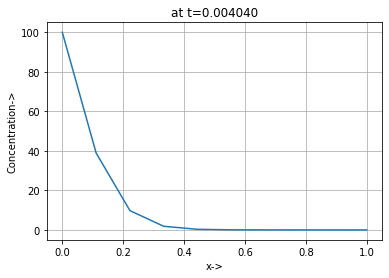

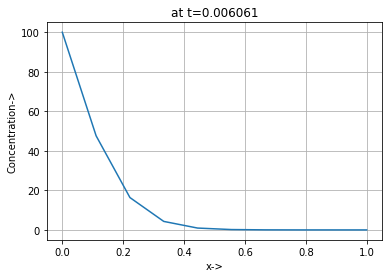

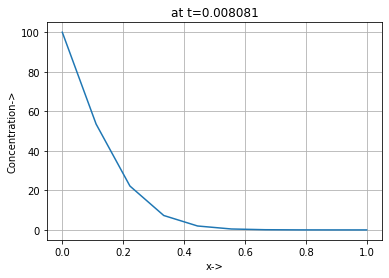

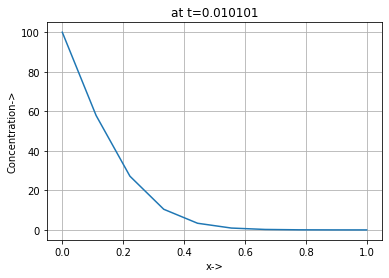

In [24]:
U5,X5,T5=CNM()

for i in range(2,6):
    plt.plot(X5,U5[:,i])
    plt.xlabel("x->")
    plt.ylabel("Concentration->")
    plt.title('at t=%f' %T5[i])
    plt.grid()
    plt.show()

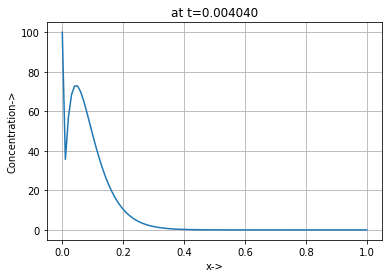

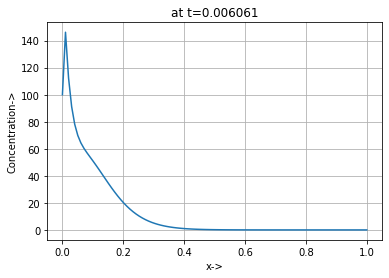

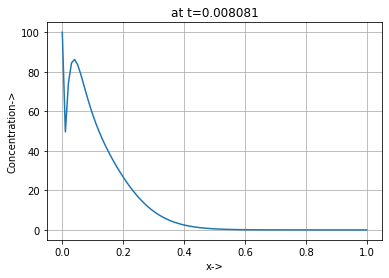

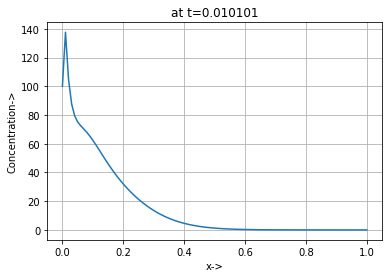

In [28]:
U6,X6,T6=CNM(Xpoints=100)

for i in range(2,6):
    plt.plot(X6,U6[:,i])
    plt.xlabel("x->")
    plt.ylabel("Concentration->")
    plt.title('at t=%f' %T6[i])
    plt.grid()
    plt.show()

## Observation:

Crank Nicolson method is **unstable for large values of Xpoints (that is for small value of dx)**
However, the oscillation is less compared to that from explicit forward euler method.

